# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# importing the dataset

data = pd.read_csv('../data/paysim1.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### What is the distribution of the outcome? 

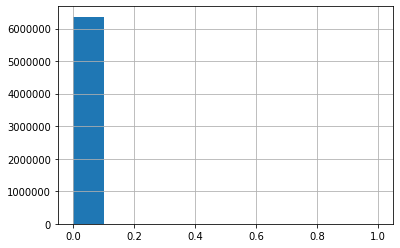

In [4]:
data['isFlaggedFraud'].hist()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

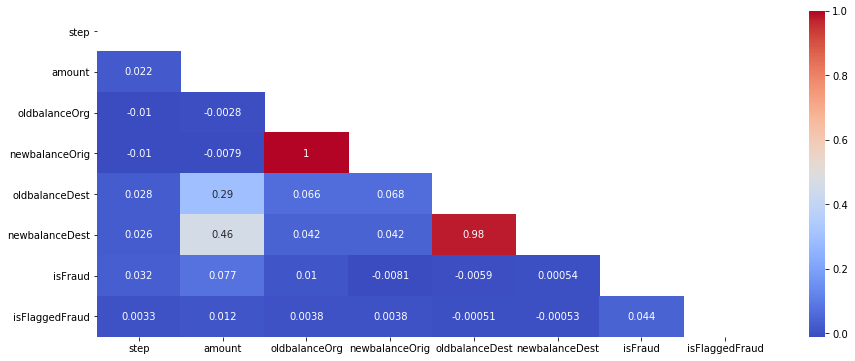

In [9]:
# heatmap to check for high correlations

corr_matrix = data.corr()

plt.figure(figsize=(15,6))
mask = np.triu(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

heatmap

In [11]:
# dropping columns oldbalanceDest and oldbalanceOrg

data.drop(['oldbalanceDest','oldbalanceOrg'], axis=1, inplace=True)

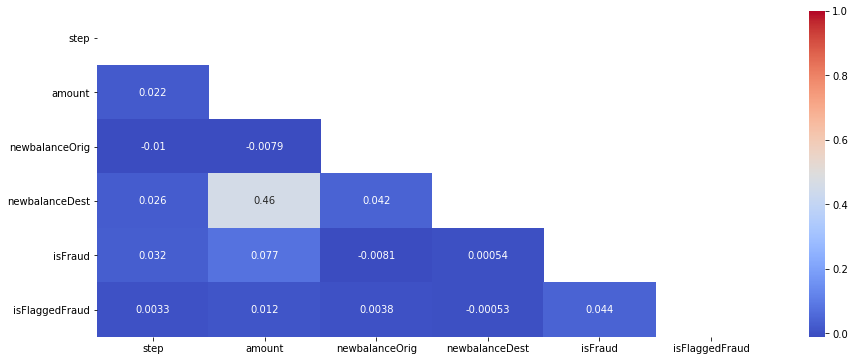

In [12]:
corr_matrix = data.corr()

plt.figure(figsize=(15,6))
mask = np.triu(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

heatmap

In [15]:
# Check for null values
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
newbalanceOrig    0
nameDest          0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [13]:
# looking at the variables and their types
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
newbalanceOrig    float64
nameDest           object
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [16]:
# creating dummies for column type

dummies = pd.get_dummies(data['type'])
data2 = pd.concat([data, dummies], axis=1)

In [18]:
data2.dtypes

step                int64
type               object
amount            float64
nameOrig           object
newbalanceOrig    float64
nameDest           object
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
CASH_IN             uint8
CASH_OUT            uint8
DEBIT               uint8
PAYMENT             uint8
TRANSFER            uint8
dtype: object

In [19]:
# dropping unnecessary columns
data2.drop(['type','nameOrig','nameDest'], axis=1, inplace=True)

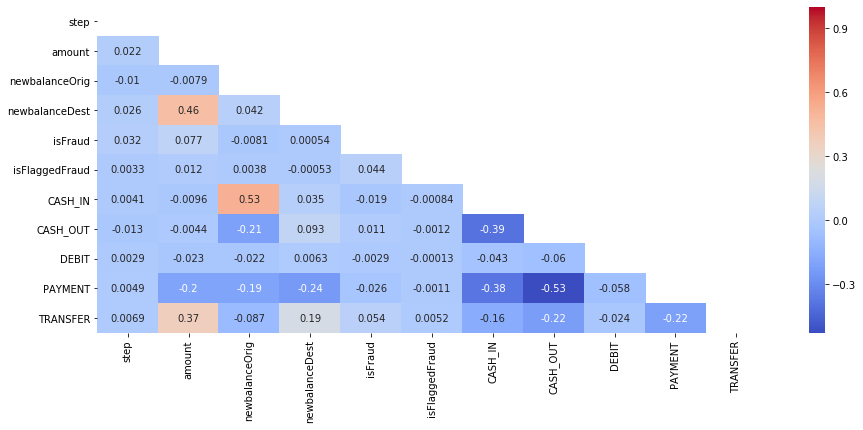

In [20]:
corr_matrix = data2.corr()

plt.figure(figsize=(15,6))
mask = np.triu(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

heatmap

In [27]:
data2.shape

(6362620, 11)

### Run a logisitc regression classifier and evaluate its accuracy.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [22]:
data2['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [23]:
# dealing with the problems of scaling
isFraud_0 = data2[data2['isFraud'] == 0]
isFraud_1 = data2[data2['isFraud'] == 1]
 
isFraud_0_downsampled = resample(isFraud_0, replace=False, n_samples=len(isFraud_1))

data3 = pd.concat([isFraud_0_downsampled, isFraud_1])

1    8213
0    8213
Name: isFraud, dtype: int64

In [24]:
data3

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
5792000,401,780.85,144101.15,357870.61,0,0,0,0,1,0,0
1515358,153,235037.75,0.00,3129839.16,0,0,0,1,0,0,0
4829572,347,291413.54,7458778.79,3400318.95,0,0,1,0,0,0,0
5183788,360,24281.06,0.00,794555.58,0,0,0,1,0,0,0
2485416,204,6041.46,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,0.00,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,0.00,0.00,1,0,0,0,0,0,1


In [25]:
data3['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [26]:
# split the data

y = data3['isFraud']
X = data3.drop(['isFraud'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13140, 10) (3286, 10) (13140,) (3286,)


In [28]:
# creating and training the model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Make a prediction
y_pred = model.predict(X_test)

In [30]:
# accurancy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6920267802799757

### Now pick a model of your choice and evaluate its accuracy.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
# Make a prediction
knc_predict = knc.predict(X_test)

In [35]:
knc_accuracy = accuracy_score(y_test, knc_predict)
knc_accuracy

0.8085818624467438

### Which model worked better and how do you know?

In [8]:
# The KNeighborsClassifier works better